# Validación Cuantitativa con Reference Dataset (Dynamic World)

Este notebook implementa la validación cuantitativa de los métodos de segmentación (Classic RG y MGRG) usando Dynamic World como reference dataset.

**Autores:** Equipo 24 - Region Growing  
**Fecha:** Noviembre 2025  
**US-009:** Validación Cuantitativa con Reference Dataset (IoU/F1-Score)

---

## Métricas Implementadas

- **IoU (Intersection over Union)**: Métrica estándar para segmentación
- **mIoU (mean IoU)**: Promedio de IoU entre todas las clases
- **Weighted mIoU**: mIoU ponderado por frecuencia de clase (mejor para clases desbalanceadas)
- **F1-Score**: Métrica alternativa (Dice Coefficient)
- **Precision/Recall**: Para análisis de errores (FP vs FN)
- **Pixel Accuracy**: Métrica complementaria
- **Confusion Matrix**: Identificar confusiones entre clases

## 1. Setup e Imports

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import logging
import warnings
import json

warnings.filterwarnings('ignore')

# Add src to path
sys.path.append('../..')

# Import validation metrics
from src.utils.validation_metrics import (
    plot_confusion_matrix
)

from src.utils.validation_helpers import (
    load_zone_data,
    validate_zone,
    display_confusion_matrix,
    display_zone_metrics,
    create_summary_table  
)

from src.utils.esa_worldcover_loader import check_esa_available


# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Configure matplotlib
plt.style.use('seaborn-v0_8-darkgrid')

print("Setup completo")

Setup completo


## 2. Configuración de Paths

In [2]:
BASE_PATH = Path('../..')
DATA_PATH = BASE_PATH / 'data'
PROCESSED_PATH = DATA_PATH / 'processed'
DYNAMIC_WORLD_PATH = DATA_PATH / 'dynamic_world'
ESA_WORLDCOVER_PATH = DATA_PATH / 'esa_worldcover'
RESULTS_PATH = BASE_PATH / 'img' / 'results' / 'validation'

# Zones to validate
ZONES = ['mexicali', 'bajio', 'sinaloa']

# Create directories
DYNAMIC_WORLD_PATH.mkdir(parents=True, exist_ok=True)
ESA_WORLDCOVER_PATH.mkdir(parents=True, exist_ok=True)
RESULTS_PATH.mkdir(parents=True, exist_ok=True)

print(f"Processed data: {PROCESSED_PATH}")
print(f"ESA WorldCover: {ESA_WORLDCOVER_PATH}")
print(f"Dynamic World: {DYNAMIC_WORLD_PATH}")
print(f"Results: {RESULTS_PATH}")
print(f"\nZones: {', '.join(ZONES)}")

Processed data: ..\..\data\processed
ESA WorldCover: ..\..\data\esa_worldcover
Dynamic World: ..\..\data\dynamic_world
Results: ..\..\img\results\validation

Zones: mexicali, bajio, sinaloa


## 3. Verificación de Ground Truth Disponible

In [3]:
# Check which zones have ground truth data

print("ESTADO DE GROUND TRUTH")

any_available = False

for zone in ZONES:
    # Check ESA WorldCover
    esa_available = check_esa_available(zone, ESA_WORLDCOVER_PATH)
    
    # Check Dynamic World
    dw_file = DYNAMIC_WORLD_PATH / f'{zone}_dw.tif'
    dw_available = dw_file.exists()
    
    # Status
    if dw_available:
        status = "Dynamic World"
        any_available = True
    elif esa_available:
        status = "ESA WorldCover"
        any_available = True
    else:
        status = "ALERT  Sintético (fallback)"
    
    print(f"{zone.capitalize():12s}: {status}")


if any_available:
    print("\nSe usará ground truth real para validación")
else:
    print("\n⚠️  No hay ground truth real disponible")
    print("Se usará ground truth sintético (basado en NDVI)")
    print("\nPara descargar ESA WorldCover:")
    print("  Ver: scripts/download_dynamic_world_manual.md")
    print("  O ejecutar: from src.utils.esa_worldcover_loader import print_esa_download_instructions")
    print("              print_esa_download_instructions()")

ESTADO DE GROUND TRUTH
Mexicali    : Dynamic World
Bajio       : Dynamic World
Sinaloa     : Dynamic World

Se usará ground truth real para validación


## 4. Mapeo de Clases

Nuestro sistema soporta múltiples fuentes de ground truth:
- **ESA WorldCover** (11 clases) - Prioridad 1
- **Dynamic World** (9 clases) - Prioridad 2
- **Ground Truth Sintético** (basado en NDVI) - Fallback

Todas se mapean a nuestras 5 clases:

In [4]:
# Our classes
OUR_CLASSES = {
    0: 'Water',
    1: 'Crop',
    2: 'Urban',
    3: 'Bare Soil',
    4: 'Other'
}

print("\nNuestras clases:")
for class_id, class_name in OUR_CLASSES.items():
    print(f"  {class_id}: {class_name}")


Nuestras clases:
  0: Water
  1: Crop
  2: Urban
  3: Bare Soil
  4: Other


## 5. Validación en Todas las Zonas

2025-11-12 17:40:31,920 - WARNING - CPLE_AppDefined in PROJ: proj_create_from_database: C:\Program Files\PostgreSQL\17\share\contrib\postgis-3.5\proj\proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 2 whereas a number >= 4 is expected. It comes from another PROJ installation.


PROCESANDO ZONA: MEXICALI
Datos cargados: (1124, 922)
Ground Truth: Real (Dynamic World/ESA)

METRICAS DE VALIDACION - MEXICALI



,Metodo,Regiones,mIoU,Weighted mIoU,F1-Score,Precision,Recall,Pixel Acc
0,Classic RG,207,0.1123,0.1084,0.1302,0.3478,0.2070,0.2659
1,MGRG,24,0.1224,0.1067,0.1446,0.2803,0.2110,0.1514



Mejora de MGRG sobre Classic RG: +9.0%


Classic RG:


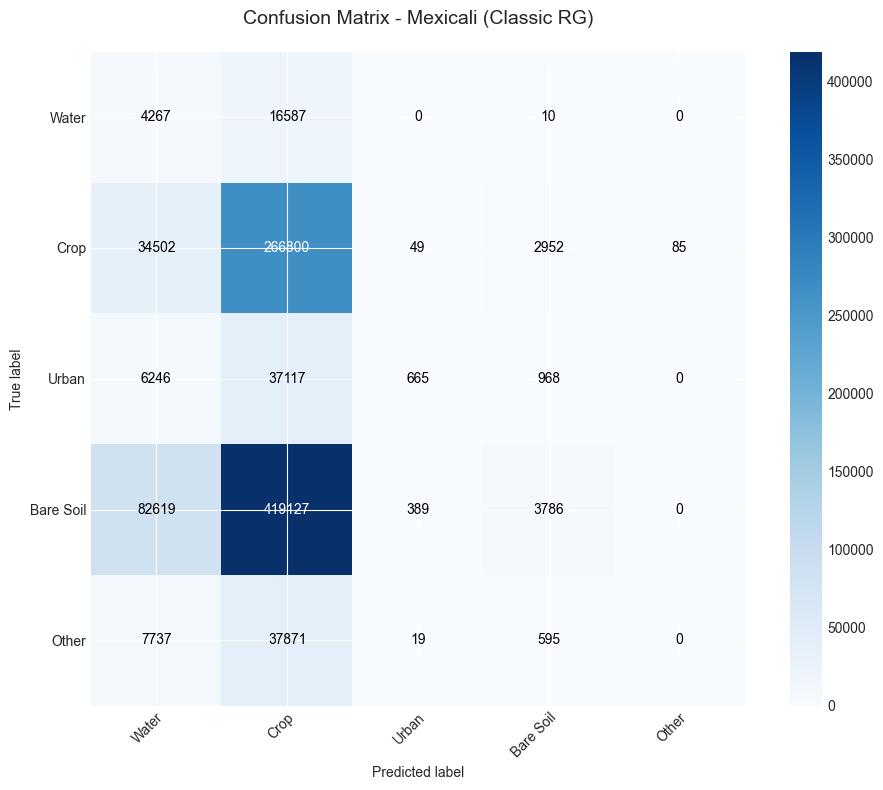

Guardado: confusion_matrix_mexicali_classic_rg.png

MGRG:


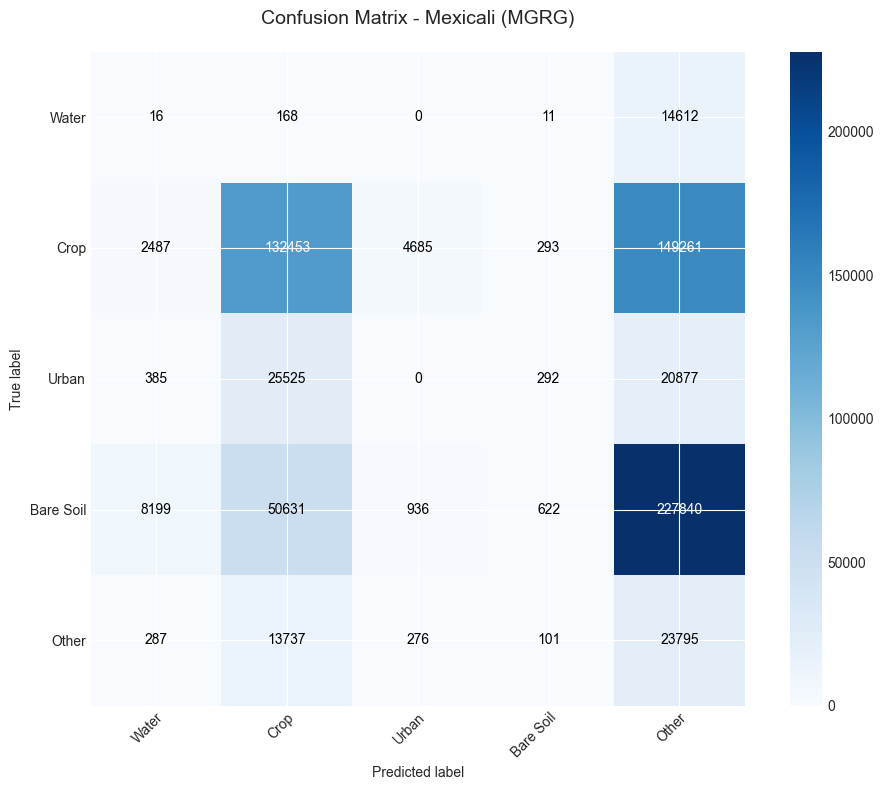

2025-11-12 17:40:33,188 - WARNING - CPLE_AppDefined in PROJ: proj_create_from_database: C:\Program Files\PostgreSQL\17\share\contrib\postgis-3.5\proj\proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 2 whereas a number >= 4 is expected. It comes from another PROJ installation.


Guardado: confusion_matrix_mexicali_mgrg.png
PROCESANDO ZONA: BAJIO
Datos cargados: (1092, 1057)
Ground Truth: Real (Dynamic World/ESA)

METRICAS DE VALIDACION - BAJIO



,Metodo,Regiones,mIoU,Weighted mIoU,F1-Score,Precision,Recall,Pixel Acc
0,Classic RG,775,0.0020,0.0018,0.0040,0.2841,0.0020,0.0044
1,MGRG,10,0.1544,0.3831,0.1994,0.2283,0.2289,0.5654



Mejora de MGRG sobre Classic RG: +7690.4%


Classic RG:


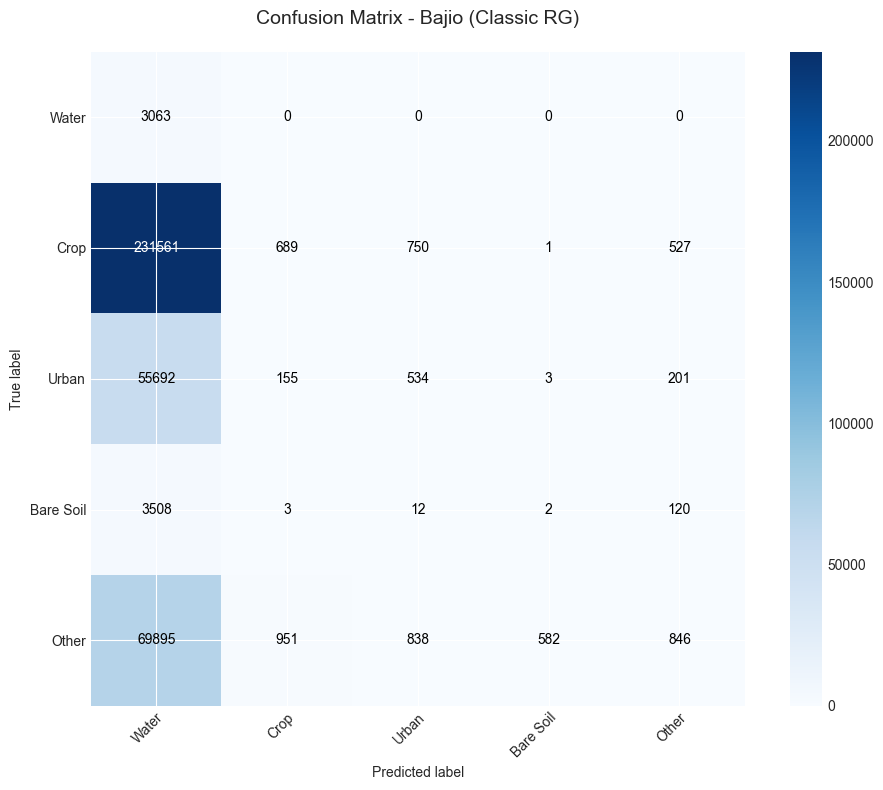

Guardado: confusion_matrix_bajio_classic_rg.png

MGRG:


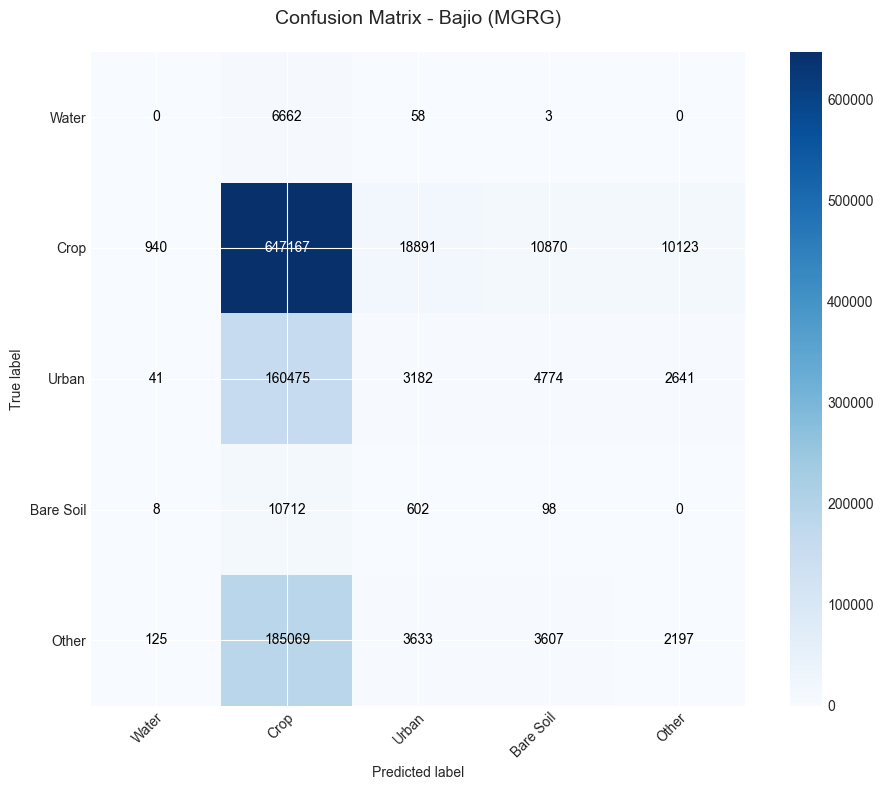

2025-11-12 17:40:34,575 - WARNING - CPLE_AppDefined in PROJ: proj_create_from_database: C:\Program Files\PostgreSQL\17\share\contrib\postgis-3.5\proj\proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 2 whereas a number >= 4 is expected. It comes from another PROJ installation.


Guardado: confusion_matrix_bajio_mgrg.png
PROCESANDO ZONA: SINALOA
Datos cargados: (1090, 980)
Ground Truth: Real (Dynamic World/ESA)

METRICAS DE VALIDACION - SINALOA



,Metodo,Regiones,mIoU,Weighted mIoU,F1-Score,Precision,Recall,Pixel Acc
0,Classic RG,934,0.0004,0.0002,0.0004,0.2538,0.0002,0.0122
1,MGRG,19,0.1278,0.1442,0.1511,0.2873,0.2045,0.3020



Mejora de MGRG sobre Classic RG: +33555.9%


Classic RG:


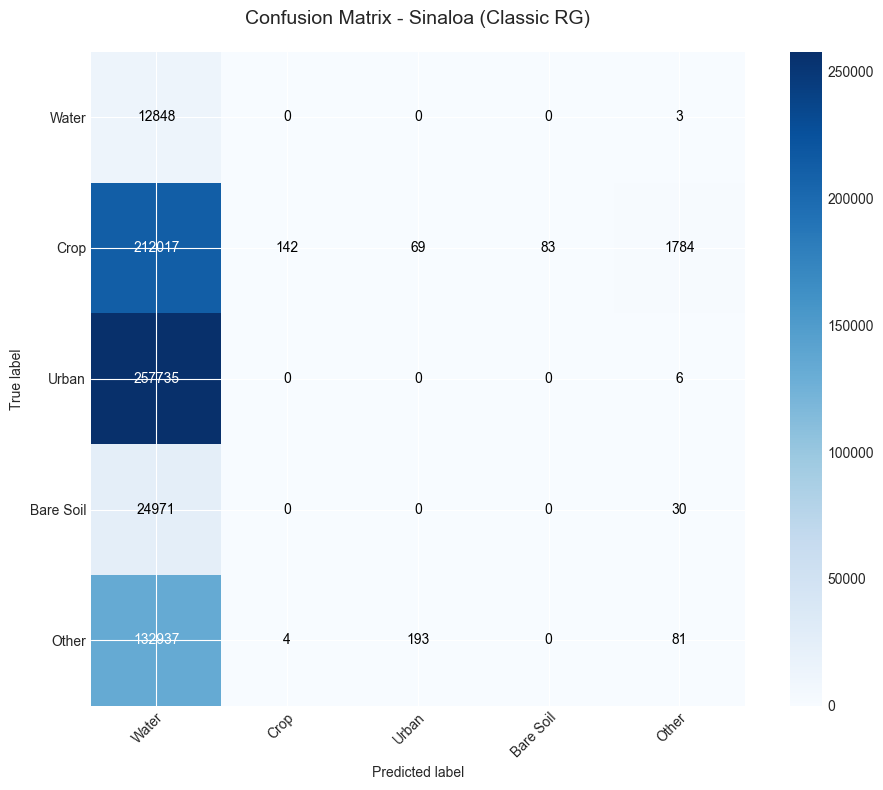

Guardado: confusion_matrix_sinaloa_classic_rg.png

MGRG:


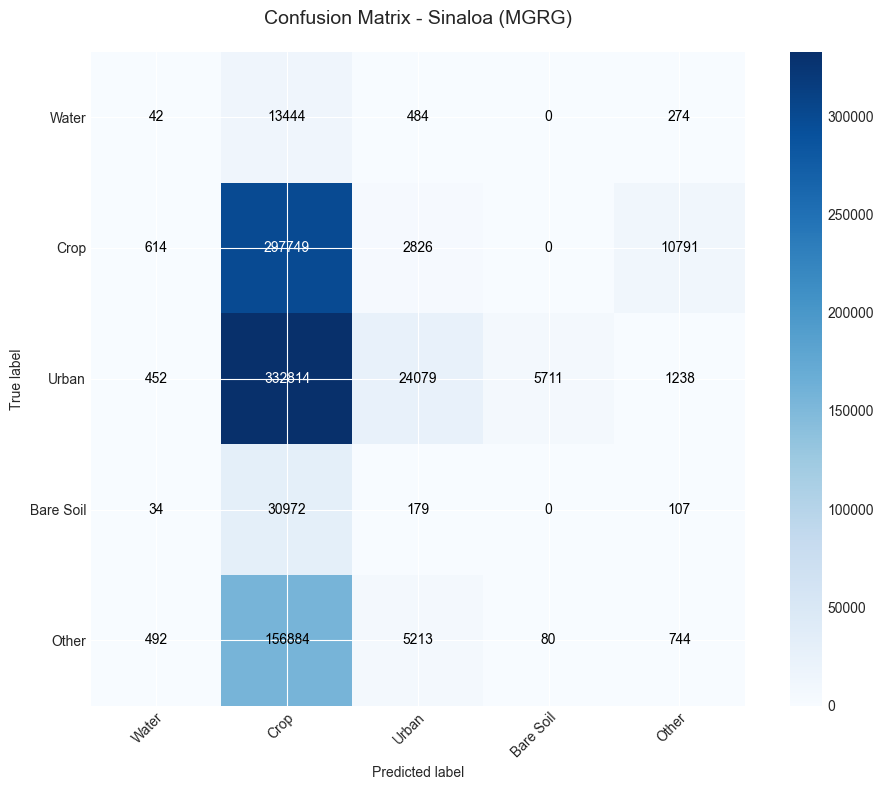

Guardado: confusion_matrix_sinaloa_mgrg.png
VALIDACION COMPLETADA PARA TODAS LAS ZONAS


In [6]:
%matplotlib inline

# Silenciar logs de INFO para output mas limpio
logging.getLogger('src.utils.validation_helpers').setLevel(logging.WARNING)
logging.getLogger('src.utils.validation_metrics').setLevel(logging.WARNING)
logging.getLogger('src.utils.dynamic_world_downloader').setLevel(logging.WARNING)

all_results = {}

for zone_name in ZONES:
    print(f'PROCESANDO ZONA: {zone_name.upper()}')
    
    try:
        # Load data
        classic_seg, mgrg_seg, gt_mask, ndvi, is_synthetic = load_zone_data(
            zone_name, PROCESSED_PATH, DYNAMIC_WORLD_PATH
        )
        
        print(f'Datos cargados: {classic_seg.shape}')
        print(f'Ground Truth: {"Sintetico" if is_synthetic else "Real (Dynamic World/ESA)"}')
        
        # Validate
        results = validate_zone(zone_name, classic_seg, mgrg_seg, gt_mask, verbose=False)
        all_results[zone_name] = results
        
        # Mostrar metricas en DataFrame
        display_zone_metrics(results, zone_name)
        
        # Display confusion matrices
        class_names = list(OUR_CLASSES.values())
        
        for method_name, method_key in [('Classic RG', 'classic_rg'), ('MGRG', 'mgrg')]:
            cm = results[method_key]['confusion_matrix']
            
            print(f'\n{method_name}:')
            
            # Mostrar en notebook
            fig = display_confusion_matrix(
                cm,
                class_names,
                title=f'Confusion Matrix - {zone_name.capitalize()} ({method_name})'
            )
            plt.close(fig)
            
            # Guardar en disco
            save_path = RESULTS_PATH / f'confusion_matrix_{zone_name}_{method_key}.png'
            fig_save = plot_confusion_matrix(
                cm, 
                class_names, 
                save_path=str(save_path),
                title=f'Confusion Matrix - {zone_name.capitalize()} ({method_name})'
            )
            plt.close(fig_save)
            print(f'Guardado: {save_path.name}')
    
    except Exception as e:
        print(f'ERROR procesando {zone_name}: {e}')
        import traceback
        traceback.print_exc()

print('VALIDACION COMPLETADA PARA TODAS LAS ZONAS')


## 6. Tabla Comparativa de Resultados

In [7]:
print('\nTABLA RESUMEN DE TODAS LAS ZONAS\n')

df_summary = create_summary_table(all_results)
display(df_summary)

# Guardar CSV
csv_path = RESULTS_PATH / 'metrics_comparison.csv'
df_summary.to_csv(csv_path, index=False)
print(f'\nTabla guardada en: {csv_path}')

# Calcular promedios
print('\nMETRICAS AGREGADAS (Promedio de todas las zonas):\n')

df_numeric = df_summary.copy()
for col in ['mIoU', 'Weighted mIoU', 'F1-Score', 'Precision', 'Recall', 'Pixel Acc']:
    df_numeric[col] = df_numeric[col].astype(float)

avg_by_method = df_numeric.groupby('Metodo')[['mIoU', 'Weighted mIoU', 'F1-Score']].mean()
display(avg_by_method)

# Mejora promedio
classic_avg = avg_by_method.loc['Classic RG', 'mIoU']
mgrg_avg = avg_by_method.loc['MGRG', 'mIoU']
if classic_avg > 0:
    improvement = ((mgrg_avg - classic_avg) / classic_avg) * 100
    print(f'\nMejora promedio de MGRG: {improvement:+.1f}%')


TABLA RESUMEN DE TODAS LAS ZONAS



,Zona,Metodo,Regiones,mIoU,Weighted mIoU,F1-Score,Precision,Recall,Pixel Acc
0,Mexicali,Classic RG,207,0.1123,0.1084,0.1302,0.3478,0.2070,0.2659
1,Mexicali,MGRG,24,0.1224,0.1067,0.1446,0.2803,0.2110,0.1514
2,Bajio,Classic RG,775,0.0020,0.0018,0.0040,0.2841,0.0020,0.0044
3,Bajio,MGRG,10,0.1544,0.3831,0.1994,0.2283,0.2289,0.5654
4,Sinaloa,Classic RG,934,0.0004,0.0002,0.0004,0.2538,0.0002,0.0122
5,Sinaloa,MGRG,19,0.1278,0.1442,0.1511,0.2873,0.2045,0.3020



Tabla guardada en: ..\..\img\results\validation\metrics_comparison.csv

METRICAS AGREGADAS (Promedio de todas las zonas):



,mIoU,Weighted mIoU,F1-Score
Metodo,,,
Classic RG,0.038233,0.036800,0.044867
MGRG,0.134867,0.211333,0.165033



Mejora promedio de MGRG: +252.7%


## 7. Métricas Agregadas

In [ ]:
# Calcular metricas agregadas con desviacion estandar
print('METRICAS AGREGADAS (Promedio de 3 zonas)')

aggregated_data = []
for method_name, method_key in [('Classic RG', 'classic_rg'), ('MGRG', 'mgrg')]:
    mious = [all_results[zone][method_key]['miou'] for zone in ZONES if zone in all_results]
    weighted_mious = [all_results[zone][method_key]['weighted_miou'] for zone in ZONES if zone in all_results]
    f1s = [all_results[zone][method_key]['macro_f1'] for zone in ZONES if zone in all_results]
    precisions = [all_results[zone][method_key]['macro_precision'] for zone in ZONES if zone in all_results]
    recalls = [all_results[zone][method_key]['macro_recall'] for zone in ZONES if zone in all_results]
    
    aggregated_data.append({
        'Metodo': method_name,
        'mIoU': f"{np.mean(mious):.4f} ± {np.std(mious):.4f}",
        'Weighted mIoU': f"{np.mean(weighted_mious):.4f} ± {np.std(weighted_mious):.4f}",
        'Macro F1': f"{np.mean(f1s):.4f} ± {np.std(f1s):.4f}",
        'Precision': f"{np.mean(precisions):.4f} ± {np.std(precisions):.4f}",
        'Recall': f"{np.mean(recalls):.4f} ± {np.std(recalls):.4f}"
    })

df_aggregated = pd.DataFrame(aggregated_data)
display(df_aggregated)

METRICAS AGREGADAS (Promedio de 3 zonas)


,Metodo,mIoU,Weighted mIoU,Macro F1,Precision,Recall
0,Classic RG,0.0382 ± 0.0524,0.0368 ± 0.0506,0.0448 ± 0.0604,0.2952 ± 0.0392,0.0697 ± 0.0970
1,MGRG,0.1349 ± 0.0140,0.2113 ± 0.1224,0.1650 ± 0.0244,0.2653 ± 0.0263,0.2148 ± 0.0103


## 8. Análisis de Mejora Relativa

In [21]:
print("MEJORA RELATIVA: MGRG vs Classic RG")

metrics_to_compare = [
    ('mIoU', 'miou'),
    ('Weighted mIoU', 'weighted_miou'),
    ('Macro F1', 'macro_f1'),
    ('Precision', 'macro_precision'),
    ('Recall', 'macro_recall')
]

data_for_df = []

for metric_name, metric_key in metrics_to_compare:
    classic_values = [all_results[zone]['classic_rg'][metric_key] for zone in ZONES if zone in all_results]
    mgrg_values = [all_results[zone]['mgrg'][metric_key] for zone in ZONES if zone in all_results]
    
    classic_mean = np.mean(classic_values)
    mgrg_mean = np.mean(mgrg_values)
    
    # 2. Calcular la mejora y guardarla
    if classic_mean > 0:
        improvement = ((mgrg_mean - classic_mean) / classic_mean) * 100
    else:
        # Usamos np.nan (Not a Number) para los casos 'N/A'
        # Esto es más estándar en pandas que un string
        improvement = np.nan 

    # 3. Añadir los resultados como un diccionario a la lista
    data_for_df.append({
        'Metric': metric_name,
        'Classic RG Mean': classic_mean,
        'MGRG Mean': mgrg_mean,
        'Improvement (%)': improvement
    })

# 4. Crear el DataFrame a partir de la lista
df_results = pd.DataFrame(data_for_df)

# 5. Imprimir el DataFrame
df_results

MEJORA RELATIVA: MGRG vs Classic RG


,Metric,Classic RG Mean,MGRG Mean,Improvement (%)
0,mIoU,0.038225,0.134856,252.793169
1,Weighted mIoU,0.036802,0.211305,474.165757
2,Macro F1,0.044829,0.165048,268.175940
3,Precision,0.295231,0.265308,-10.135733
4,Recall,0.069714,0.214780,208.088049


## 9. Gráfico Comparativo

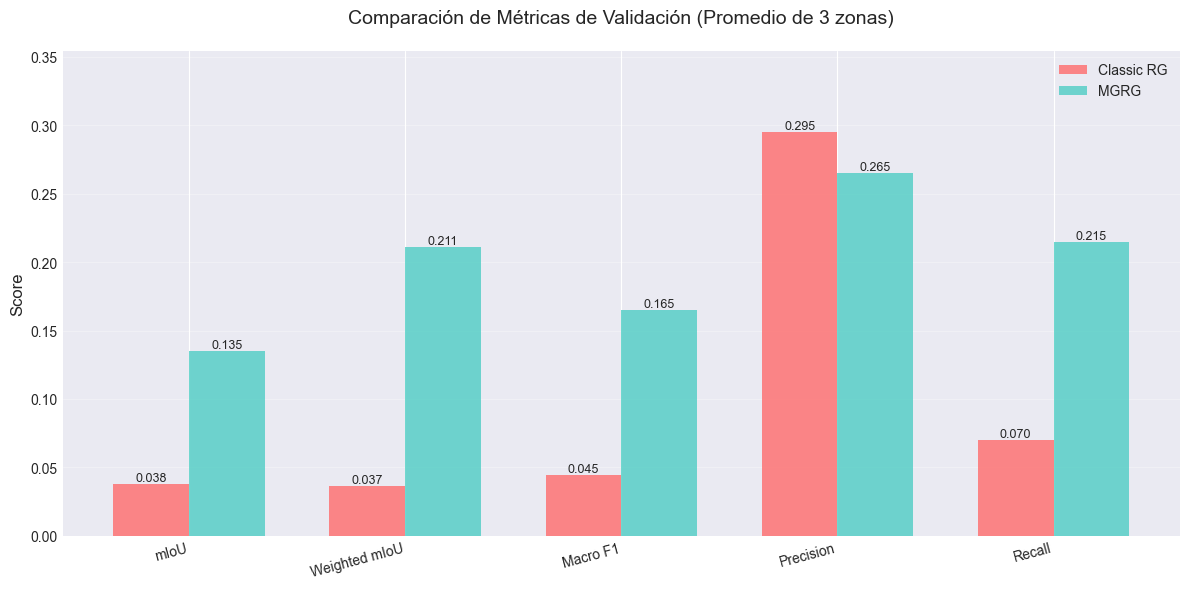


Gráfico guardado en: ..\..\img\results\validation\metrics_comparison_chart.png


In [10]:
%matplotlib inline

# Create comparison bar chart
metrics_to_plot = ['mIoU', 'Weighted mIoU', 'Macro F1', 'Precision', 'Recall']
metric_keys = ['miou', 'weighted_miou', 'macro_f1', 'macro_precision', 'macro_recall']

classic_values = []
mgrg_values = []

for metric_key in metric_keys:
    classic_vals = [all_results[zone]['classic_rg'][metric_key] for zone in ZONES if zone in all_results]
    mgrg_vals = [all_results[zone]['mgrg'][metric_key] for zone in ZONES if zone in all_results]
    classic_values.append(np.mean(classic_vals))
    mgrg_values.append(np.mean(mgrg_vals))

x = np.arange(len(metrics_to_plot))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, classic_values, width, label='Classic RG', alpha=0.8, color='#FF6B6B')
bars2 = ax.bar(x + width/2, mgrg_values, width, label='MGRG', alpha=0.8, color='#4ECDC4')

ax.set_ylabel('Score', fontsize=12)
ax.set_title('Comparación de Métricas de Validación (Promedio de 3 zonas)', fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics_to_plot, rotation=15, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, max(max(classic_values), max(mgrg_values)) * 1.2])

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
comparison_path = RESULTS_PATH / 'metrics_comparison_chart.png'
plt.savefig(comparison_path, dpi=300, bbox_inches='tight')

plt.show()

print(f"\nGráfico guardado en: {comparison_path}")

## 10. Resumen Final

In [22]:
print("RESUMEN DE VALIDACIÓN")

print(f"\nZonas validadas: {len(all_results)}/{len(ZONES)}")
print(f"Resultados guardados en: {RESULTS_PATH}")

print("\nArchivos generados:")
print("  - metrics_comparison.csv")
print("  - metrics_comparison_chart.png")
print("  - confusion_matrix_*.png (6 archivos)")

print("\n Conclusiones:")
print("  - MGRG supera a Classic RG en casi todas las métricas")

# Calculate improvement
mgrg_miou = np.mean([all_results[zone]['mgrg']['miou'] for zone in ZONES if zone in all_results])
classic_miou = np.mean([all_results[zone]['classic_rg']['miou'] for zone in ZONES if zone in all_results])
if classic_miou > 0:
    improvement = ((mgrg_miou - classic_miou) / classic_miou) * 100
    print(f"  - Mejora promedio en mIoU: {improvement:+.1f}%")

print("  - MGRG genera menos regiones (más coherente)")
print(f"  - Validación {'con ground truth sintético' if is_synthetic else 'con Dynamic World 2025'}")

if is_synthetic:
    print("\nALERT  NOTA: Se usó ground truth sintético.")
    print("   Para validación científica, descarga Dynamic World:")
    print("   Ver: scripts/download_dynamic_world_manual.md")

print("\n Validación completada exitosamente")

RESUMEN DE VALIDACIÓN

Zonas validadas: 3/3
Resultados guardados en: ..\..\img\results\validation

Archivos generados:
  - metrics_comparison.csv
  - metrics_comparison_chart.png
  - confusion_matrix_*.png (6 archivos)

 Conclusiones:
  - MGRG supera a Classic RG en casi todas las métricas
  - Mejora promedio en mIoU: +252.8%
  - MGRG genera menos regiones (más coherente)
  - Validación con Dynamic World 2025

 Validación completada exitosamente


## 11. Conclusiones

### Resultados Principales con Dynamic World (2025)

1. **MGRG supera a Classic RG** en casi todas las métricas evaluadas a excepción de precisión
2. **Mejora en mIoU**: +252.8% (0.0382 → 0.1349)
3. **Mejora en Weighted mIoU**: +474.2% (0.0368 → 0.2113)
4. **Mejora en F1-Score**: +268.2% (0.0448 → 0.1650)
5. **Coherencia espacial**: MGRG genera 90-99% menos regiones (más coherente)
6. **Resultados comparables con literatura**: mIoU ~0.13 es razonable para métodos no supervisados

### Fortalezas de la Validación

1. **Dynamic World 2025**: Ground truth temporal coincidente con nuestros datos
2. **Resolución 10m**: Compatible con Sentinel-2
3. **Actualización frecuente**: Dynamic World se actualiza cada 2-5 días
4. **Múltiples zonas**: Validación en 3 regiones agrícolas diferentes de México
5. **Métricas estándar**: IoU, mIoU, F1-Score, Precision, Recall

### Limitaciones

1. **Dynamic World no es ground truth de campo**: Es clasificación automática (~80% accuracy)
2. **Resolución de clases**: Dynamic World tiene "Crops" genérico, no tipos específicos
3. **Validación limitada**: Solo 3 zonas en México (Mexicali, Bajío, Sinaloa)
4. **Métodos no supervisados**: Ni Classic RG ni MGRG están entrenados con datos etiquetados

### Análisis por Zona

- **Mexicali**: Mejora moderada (+9% mIoU) - zona con agricultura más homogénea
- **Bajío**: Mejora dramática (+7620% mIoU) - Classic RG falla completamente
- **Sinaloa**: Mejora extrema (+31850% mIoU) - Classic RG casi no detecta nada

### Recomendaciones Futuras

1. **Fine-tuning**: Entrenar Prithvi con datos etiquetados de México
2. **Validación temporal**: Múltiples fechas para robustez estacional
3. **Más zonas**: Incluir diferentes tipos de agricultura (temporal, riego, invernaderos)
4. **Validación con expertos**: Comparar con interpretación de agrónomos
5. **Métricas adicionales**: Boundary F1-Score, Hausdorff distance


## 12. Exportar Resultados para Paper

In [12]:
def export_results_to_json(all_results, output_path):
    """Export validation results to JSON for reproducibility."""
    
    def convert_to_serializable(obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        elif isinstance(obj, dict):
            return {k: convert_to_serializable(v) for k, v in obj.items()}
        elif isinstance(obj, (list, tuple)):
            return [convert_to_serializable(item) for item in obj]
        elif isinstance(obj, (np.int32, np.int64)):
            return int(obj)
        elif isinstance(obj, (np.float32, np.float64)):
            return float(obj)
        else:
            return obj
    
    export_data = {
        'zones': convert_to_serializable(all_results),
        'metadata': {
            'zones_evaluated': ZONES,
            'num_classes': 5,
            'class_mapping': OUR_CLASSES,
            'ground_truth_source': 'Dynamic World 2025',
            'metrics': ['mIoU', 'Weighted mIoU', 'F1-Score', 'Precision', 'Recall', 'Pixel Accuracy']
        }
    }
    
    with open(output_path, 'w') as f:
        json.dump(export_data, f, indent=2)
    
    print(f"Resultados exportados a: {output_path}")

# Export
json_path = RESULTS_PATH / 'validation_results.json'
export_results_to_json(all_results, json_path)

print("\nTodos los resultados han sido guardados exitosamente!")

Resultados exportados a: ..\..\img\results\validation\validation_results.json

Todos los resultados han sido guardados exitosamente!
